In [38]:
import ujson
import datasets
from pathlib import Path
import networkx as nx
from IPython.display import SVG, display, HTML
import pandas as pd

In [15]:
data = []
with open('/mnt/storage/le/shortest_path/new_subgraph_dataset/t5-large-ssm/MINTAKA/mintaka_test_labeled.jsonl', 'r') as f:
    for line in f:
        data.append(ujson.loads(line))

len(data)

28325

In [22]:
import enum
from typing import List
from pywikidata import Entity


class SubgraphNodeType(str, enum.Enum):
    """SubgraphNodeType - Enum class with types of subgraphs nodes"""

    INTERNAL = "Internal"
    QUESTIONS_ENTITY = "Question entity"
    ANSWER_CANDIDATE_ENTITY = "Answer candidate entity"


def nx_subgraph_to_svg_plt(nx_subgraph, correct_answer_entities: List[Entity]):
    correct_answer_entities_ids = [correct_answer_entity.idx for correct_answer_entity in correct_answer_entities]
    for node in nx_subgraph.nodes:
        if nx_subgraph.nodes[node]['name_'] in correct_answer_entities_ids:
            nx_subgraph.nodes[node]['shape'] = 'square'

        if nx_subgraph.nodes[node]['type'] == str(SubgraphNodeType.ANSWER_CANDIDATE_ENTITY).split('.')[-1]:
            nx_subgraph.nodes[node]['style'] = 'filled'
            if nx_subgraph.nodes[node]['name_'] in correct_answer_entities_ids:
                nx_subgraph.nodes[node]['fillcolor'] = 'green'
            else:
                nx_subgraph.nodes[node]['fillcolor'] = 'coral'
        elif nx_subgraph.nodes[node]['type'] == str(SubgraphNodeType.QUESTIONS_ENTITY).split('.')[-1]:
            nx_subgraph.nodes[node]['style'] = 'filled'
            nx_subgraph.nodes[node]['fillcolor'] = 'deepskyblue'
        else:
            nx_subgraph.nodes[node]['style'] = 'filled'
            nx_subgraph.nodes[node]['fillcolor'] = 'lightgrey'

    agraph = nx.nx_agraph.to_agraph(nx_subgraph)
    plt = agraph.draw(prog='dot',format='svg')
    return plt

In [39]:
stat = {
    'number_of_nodes': [],
    'answer_not_candidate': [],
    'answer_not_candidate_and_it_question_entity': [],
}

for record in data:
    stat['number_of_nodes'].append(len(record['graph']['nodes']))
    stat['answer_not_candidate'].append(False)
    stat['answer_not_candidate_and_it_question_entity'].append(False)

    correct_answer_ids = [idx.lower() for idx in record['groundTruthAnswerEntity']]
    for node in record['graph']['nodes']:
        if (
            node['type'] != 'ANSWER_CANDIDATE_ENTITY' and 
            node['name_'].lower() in correct_answer_ids
        ):
            stat['answer_not_candidate'][-1] = True
            if node['type'] == 'QUESTIONS_ENTITY':
                stat['answer_not_candidate_and_it_question_entity'][-1] = True

            break

In [46]:
stat_df = pd.DataFrame(stat)
stat_df.describe()

,number_of_nodes
count,28325.000000
mean,3.275552
std,1.626990
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,17.000000


In [56]:
stat_df[
    (stat_df['answer_not_candidate'] == True) &
    (stat_df['answer_not_candidate_and_it_question_entity'] == True)
]

,number_of_nodes,answer_not_candidate,answer_not_candidate_and_it_question_entity
19,3,True,True
20,4,True,True
22,3,True,True
23,7,True,True
24,3,True,True
...,...,...,...
27767,2,True,True
27834,3,True,True
27839,3,True,True
27904,2,True,True


question:  Who is older, The Weeknd or Drake?


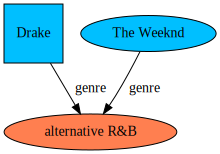

In [58]:
record = data[22]
print('question: ', record['question'])
nx_subgraph = nx.readwrite.json_graph.node_link_graph(record['graph'])
correct_answer_entities = [Entity(idx) for idx in record['groundTruthAnswerEntity']]
SVG(nx_subgraph_to_svg_plt(nx_subgraph, correct_answer_entities))

In [60]:
stat_df.groupby(by=['answer_not_candidate', 'answer_not_candidate_and_it_question_entity']).count()

number_of_nodes
answer_not_candidate answer_not_candidate_and_it_question_entity                 
False                False                                                  26123
True                 False                                                    189
                     True                                                    2013

In [67]:
stat_df[stat_df['number_of_nodes'] == 0]

,number_of_nodes,answer_not_candidate,answer_not_candidate_and_it_question_entity
13734,0,False,False
25501,0,False,False
25502,0,False,False
25507,0,False,False
27107,0,False,False
27113,0,False,False
27120,0,False,False
27205,0,False,False
27206,0,False,False
27439,0,False,False
